In [239]:
# import pandas, numpy

import pandas as pd
import numpy as np
import datetime as dt

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 100)

In [262]:
# read in data

allstar = pd.read_csv("./baseballdatabank-2019.2/core/AllstarFull.csv")
appear = pd.read_csv("./baseballdatabank-2019.2/core/Appearances.csv")
awardplay = pd.read_csv("./baseballdatabank-2019.2/core/AwardsPlayers.csv")
batting = pd.read_csv("./baseballdatabank-2019.2/core/Batting.csv")
battingpost = pd.read_csv("./baseballdatabank-2019.2/core/BattingPost.csv")
fielding = pd.read_csv("./baseballdatabank-2019.2/core/Fielding.csv")

#fieldingof = pd.read_csv("./baseballdatabank-2019.2/core/FieldingOF.csv")

fieldingofsplit = pd.read_csv("./baseballdatabank-2019.2/core/FieldingOFsplit.csv")
fieldingpost = pd.read_csv("./baseballdatabank-2019.2/core/FieldingPost.csv")


hof = pd.read_csv("./baseballdatabank-2019.2/core/HallOfFame.csv")
hof.drop(columns=['votedBy', 'ballots', 'needed', 'votes', 'needed_note'], axis=1, inplace=True)

people = pd.read_csv("./baseballdatabank-2019.2/core/People.csv")
people.drop(columns = ['birthYear', 'birthMonth', 'birthDay', 'birthCountry', 'birthState', 'birthCity', 'deathYear', 'deathMonth', 'deathCountry', 'deathDay', 'deathState', 'deathCity', 'nameGiven'], axis=1, inplace=True)

pitch = pd.read_csv("./baseballdatabank-2019.2/core/Pitching.csv")
pitchpost = pd.read_csv("./baseballdatabank-2019.2/core/PitchingPost.csv")
# salaries = pd.read_csv("./baseballdatabank-2019.2/core/Salaries.csv")
fangraph = pd.read_csv("./FanGraphs Leaderboard.csv")

In [263]:
# drop people who have not ended their careers or who never played a game

debutnotnull = people[people['debut'].notnull()]
finalgamenotnull = people[people['finalGame'].notnull()]
people = pd.concat([debutnotnull,finalgamenotnull]).drop_duplicates()

# make people debut and final game columns into dates
people['debut'] = pd.to_datetime(people['debut'])
people['finalGame'] = pd.to_datetime(people['finalGame'])

# get difference between debuts and final games
people['careerlength'] = people['finalGame'] - people['debut']
# converts careerlength to # days
people['careerlength'] = people['careerlength'].astype(dt.timedelta).map(lambda x: np.nan if pd.isnull(x) else x.days)

people['recentretire'] = dt.datetime.now() - people['finalGame']
people['recentretire'] = people['recentretire'].astype(dt.timedelta).map(lambda x: np.nan if pd.isnull(x) else x.days)

people['Name'] = people['nameFirst'] + ' ' + people['nameLast']

In [264]:
# rosepe01 - Pete Rose
# jacksjo01 - Shoeless Joe Jackson
# bondsba01 - Barry Bonds
# mcgwima01 - Mark McGwire
# sosasa01 - Sammy Sosa
# ramirma02 - Manny Ramirez
# clemero02 - Roger Clemens
# palmera01 - Rafael Palmeiro
# rodriiv01 - Ivan Rodriguez
# sheffga01 - Gary Sheffield
# rodrigal01
cheaters = ['rosepe01', 'jacksjo01', 'bondsba01', 'mcgwima01', 'sosasa01', 'ramirma02', 'clemero02', 'palmera01', 'rodriiv01',
           'sheffga01', 'rodrial01']
people['scandal'] = people['playerID'].apply(lambda x : 1 if x in cheaters else 0)

In [265]:
# in our learning, we are looking at all players who didn't make the Hall, not
# just those who were voted on
# so, we can remove those from the hall table that got nos, just leaving the yes
hof = hof[hof['inducted'] == 'Y']

# remove non-players from the hall
hof = hof[hof['category'] == 'Player']

# remove players from the hall that are not in our people table
peopinhall = pd.merge(people, hof, on='playerID').drop_duplicates()['playerID']
hof = hof[hof['playerID'].isin(peopinhall)]

In [266]:
pitch.fillna(0)
pitch = pitch[pitch['playerID'] != 'ruthba01']
pitchstats = pitch.groupby(by='playerID',as_index=False).agg({'IPouts' : np.sum})
pitchstats = pitchstats[pitchstats['IPouts'] > 100]
people = people[~people['playerID'].isin(pitchstats['playerID'])]

In [267]:
stats = {'G' : 0, 'AB' : 0, 'R' : 0, 'H' : 0, '2B' : 0, '3B' : 0, 'HR' : 0, 'RBI' : 0, 'SB' : 0, 'CS' : 0, 'BB' : 0, 'SO' : 0, 'IBB' : 0, 'HBP' : 0, 'SH' : 0, 'SF' : 0, 'GIDP' : 0}

# replace NaNs in batting with 0s
batting.fillna(value=stats)
battingpost.fillna(value=stats)

# only get batting of people in our table
batting = batting[batting['playerID'].isin(people['playerID'])]
battingpost = battingpost[battingpost['playerID'].isin(people['playerID'])]

In [268]:
careerstats = batting.groupby('playerID').agg({'G' : np.sum, 'AB' : np.sum, 'R' : np.sum, 'H' : np.sum, '2B': np.sum, '3B' : np.sum, 'HR' : np.sum, 'RBI' : np.sum, 'SB' : np.sum, 'CS' : np.sum, 'BB' : np.sum, 'SO' : np.sum, 'IBB' : np.sum, 'HBP' : np.sum, 'SH' : np.sum, 'SF' : np.sum, 'GIDP' : np.sum})
careerpoststats = battingpost.groupby('playerID').agg({'G' : np.sum, 'AB' : np.sum, 'R' : np.sum, 'H' : np.sum, '2B': np.sum, '3B' : np.sum, 'HR' : np.sum, 'RBI' : np.sum, 'SB' : np.sum, 'CS' : np.sum, 'BB' : np.sum, 'SO' : np.sum, 'IBB' : np.sum, 'HBP' : np.sum, 'SH' : np.sum, 'SF' : np.sum, 'GIDP' : np.sum})

In [269]:
# get appearances of only people in our table
appear = appear[appear['playerID'].isin(people['playerID'])]

stats = {'G_all' : 0, 'GS' : 0, 'G_batting' : 0, 'G_defense' : 0, 'G_p' : 0, 'G_c' : 0, 'G_1b' : 0, 'G_2b' : 0, 'G_3b' : 0, 'G_ss' : 0, 'G_lf' : 0, 'G_cf' : 0, 'G_rf' : 0, 'G_of' : 0, 'G_dh' : 0, 'G_ph' : 0, 'G_pr' : 0}
appear.fillna(value=stats)

careerapp = appear.groupby('playerID').agg({'G_all' : np.sum, 'G_batting' : np.sum, 'G_defense' : np.sum, 'G_p' : np.sum, 'G_c' : np.sum, 'G_1b' : np.sum, 'G_2b' : np.sum, 'G_3b' : np.sum, 'G_ss' : np.sum, 'G_lf' : np.sum, 'G_cf' : np.sum, 'G_rf' : np.sum, 'G_of' : np.sum, 'G_dh' : np.sum, 'G_ph' : np.sum, 'G_pr' : np.sum})

careerapp = careerapp[careerapp['G_all'] >= 500]
careerapp['pitchpct'] = careerapp['G_p'] / careerapp['G_all']
careerapp = careerapp[careerapp['pitchpct'] < .75]

In [270]:
fielding = fielding[fielding['playerID'].isin(people['playerID'])]
stats = {'G' : 0, 'GS' : 0, 'InnOuts' : 0, 'PO' : 0, 'A' : 0, 'E' : 0, 'DP' : 0, 'PB' : 0, 'WP' : 0, 'SB' : 0, 'CS' : 0, 'ZR' : 0}
fielding.fillna(value=stats)
stats = {'G' : 0, 'GS' : 0, 'InnOuts' : 0, 'PO' : 0, 'A' : 0, 'E' : 0, 'DP' : 0, 'TP' : 0, 'PB' : 0, 'SB' : 0, 'CS' : 0}
fieldingpost.fillna(value=stats)

careerfield = fielding.groupby('playerID').agg({'G' : np.sum, 'GS' : np.sum, 'InnOuts' : np.sum, 'PO' : np.sum, 'A' : np.sum, 'E' : np.sum, 'DP' : np.sum, 'PB' : np.sum, 'WP' : np.sum, 'SB' : np.sum, 'CS' : np.sum, 'ZR' : np.sum})
careerpostfield = fieldingpost.groupby('playerID').agg({'G' : np.sum, 'GS' : np.sum, 'InnOuts' : np.sum, 'PO' : np.sum, 'A' : np.sum, 'E' : np.sum, 'DP' : np.sum, 'PB' : np.sum, 'TP' : np.sum, 'SB' : np.sum, 'CS' : np.sum})

careerfield = careerfield[careerfield['G'] >= 500]

In [271]:
# awards
awardplay = awardplay[awardplay['playerID'].isin(people['playerID'])]
awardplay['pitchtriplecrown'] = awardplay['awardID'].apply(lambda x : 1 if x == 'Pitching Triple Crown' else 0)
awardplay['triplecrown'] = awardplay['awardID'].apply(lambda x : 1 if x == 'Triple Crown' else 0)
awardplay['baseballmagallstar'] = awardplay['awardID'].apply(lambda x : 1 if x == 'Baseball Magazine All-Star' else 0)
awardplay['mvp'] = awardplay['awardID'].apply(lambda x : 1 if x == 'Most Valuable Player' else 0)
awardplay['tsnallstar'] = awardplay['awardID'].apply(lambda x : 1 if x == 'TSN All-Star' else 0)
awardplay['tsnguidemvp'] = awardplay['awardID'].apply(lambda x : 1 if x == 'TSN Guide MVP' else 0)
awardplay['tsnmlpoty'] = awardplay['awardID'].apply(lambda x : 1 if x == 'TSN Major League Player of the Year' else 0)
awardplay['tsnpitcheroty'] = awardplay['awardID'].apply(lambda x : 1 if x == 'TSN Pitcher of the Year' else 0)
awardplay['tsnpoty'] = awardplay['awardID'].apply(lambda x : 1 if x == 'TSN Player of the Year' else 0)
awardplay['roty'] = awardplay['awardID'].apply(lambda x : 1 if x == 'Rookie of the Year' else 0)
awardplay['baberuth'] = awardplay['awardID'].apply(lambda x : 1 if x == 'Babe Ruth Award' else 0)
awardplay['lou'] = awardplay['awardID'].apply(lambda x : 1 if x == 'Lou Gehrig Memorial Award' else 0)
awardplay['wsmvp'] = awardplay['awardID'].apply(lambda x : 1 if x == 'World Series MVP' else 0)
awardplay['cyyoung'] = awardplay['awardID'].apply(lambda x : 1 if x == 'Cy Young Award' else 0)
awardplay['goldglove'] = awardplay['awardID'].apply(lambda x : 1 if x == 'Gold Glove' else 0)
awardplay['fireman'] = awardplay['awardID'].apply(lambda x : 1 if x == 'TSN Fireman of the Year' else 0)
awardplay['asgmvp'] = awardplay['awardID'].apply(lambda x : 1 if x == 'All-Star Game MVP' else 0)
awardplay['hutch'] = awardplay['awardID'].apply(lambda x : 1 if x == 'Hutch Award' else 0)
awardplay['clemente'] = awardplay['awardID'].apply(lambda x : 1 if x == 'Roberto Clemente Award' else 0)
awardplay['relief'] = awardplay['awardID'].apply(lambda x : 1 if x == 'Rolaids Relief Man Award' else 0)
awardplay['nlcsmvp'] = awardplay['awardID'].apply(lambda x : 1 if x == 'NLCS MVP' else 0)
awardplay['alcsmvp'] = awardplay['awardID'].apply(lambda x : 1 if x == 'ALCS MVP' else 0)
awardplay['silver'] = awardplay['awardID'].apply(lambda x : 1 if x == 'Silver Slugger' else 0)
awardplay['branchrickey'] = awardplay['awardID'].apply(lambda x : 1 if x == 'Branch Rickey Award' else 0)
awardplay['hankaaron'] = awardplay['awardID'].apply(lambda x : 1 if x == 'Hank Arron Award' else 0)
awardplay['tsnrelief'] = awardplay['awardID'].apply(lambda x : 1 if x == 'TSN Reliever of the Year Award' else 0)
awardplay['comeback'] = awardplay['awardID'].apply(lambda x : 1 if x == 'Comeback Player of the Year' else 0)

careerawards = awardplay.groupby('playerID').agg({'pitchtriplecrown' : np.sum, 'triplecrown' : np.sum, 'baseballmagallstar' : np.sum, 
                                                 'mvp' : np.sum, 'tsnallstar' : np.sum, 'tsnguidemvp' : np.sum, 'tsnmlpoty' : np.sum,
                                                 'tsnpitcheroty' : np.sum, 'tsnpoty' : np.sum, 'roty' : np.sum, 'baberuth' : np.sum,
                                                 'lou' : np.sum, 'wsmvp' : np.sum, 'cyyoung' : np.sum, 'goldglove' : np.sum,
                                                 'fireman' : np.sum, 'asgmvp' : np.sum, 'hutch' : np.sum, 'clemente' : np.sum,
                                                 'relief' : np.sum, 'nlcsmvp' : np.sum, 'alcsmvp' : np.sum, 'silver' : np.sum,
                                                 'branchrickey' : np.sum, 'hankaaron' : np.sum, 'tsnrelief' : np.sum,
                                                 'comeback' : np.sum})

In [272]:
fanpeop = pd.merge(people, fangraph, on='Name')
fanpeop = pd.merge(careerstats, fanpeop, on='playerID')

In [273]:
fanpeop.rename(index=str, columns={"G_x" : "Career Stats G", "AB" : "Career Stats AB", "R_x" : "Career Stats R", "H" : "Career Stats H",
                                  "2B" : "Career Stats 2B", "3B" : "Career Stats 3B", "HR_x" : "Career Stats HR",
                                  "RBI_x" : "Career Stats RBI", "SB_x" : "Career Stats SB", "CS" : "Career Stats CS",
                                  "BB" : "Career Stats BB", "SO" : "Career Stats SO", "IBB" : "Career Stats IBB", 
                                  "HBP" : "Career Stats HBP", "SH" : "Career Stats SH", "SF": "Career Stats SF",
                                  "GIDP" : "Career Stats GIDP", "G_y" : "FanGraphs G", "PA" : "FanGraphs PA",
                                  "HR_y" : "FanGraphs HR", "R_y" : "FanGraphs R", "RBI_y" : "FanGraphs RBI",
                                  "SB_y" : "FanGraphs SB"}, inplace=True)
fanpeop.drop(columns=['nameFirst', 'nameLast', 'debut', 'finalGame', 'retroID', 'bbrefID', 'recentretire',
                     'Name', 'Team', 'playerid'], axis=1, inplace=True)

In [274]:
data = fanpeop
data = pd.merge(data, careerawards, on='playerID', how='left').drop_duplicates()
data.drop(columns=['pitchtriplecrown', 'tsnpitcheroty', 'cyyoung', 'relief', 'tsnrelief'],axis=1, inplace=True)
data.rename(index=str, columns={'pitchtriplecrown' : "Pitching Triple Crown", 'triplecrown' : "Triple Crown",
                               'baseballmagallstar' : "Baseball Mag All-Star", 'mvp' : "MVP", 'tsnallstar' : "TSN All-Star",
                               'tsnguidemvp' : "TSN Guide MVP", 'tsnmlpoty' : "TSN ML POTY", 'tsnpoty' : "TSN POTY",
                               'roty' : "Rookie of the Year", 'baberuth' : "Babe Ruth Award", 'lou' : "Lou Gehrig Memorial Award",
                               'wsmvp' : "World Series MVP", 'goldglove' : "Gold Glove", 'fireman' : "TSN Fireman of the Year",
                               'asgmvp' : "ASG MVP", 'hutch' : "Hutch Award", 'clemente' : "Roberto Clemente Award",
                               'nlcsmvp' : "NLCS MVP", 'alcsmvp' : "ALCS MVP", 'silver' : "Silver Slugger", 
                               'branchrickey' : "Branch Rickey Award", 'hankaaron' : "Hank Aaron Award", 
                               'comeback' : "Comeback Player of the Year"}, inplace=True)

In [275]:
data = pd.merge(data, careerfield, on='playerID', how='left').drop_duplicates()
data.drop(columns=['WP', 'SB', 'CS', 'ZR', 'PB'],axis=1, inplace=True)
data.rename(index=str, columns={'G' : 'Games Fielding', 'GS' : 'GS Fielding', 'InnOuts' : 'Inning Outs Fielding',
                               'PO' : 'PO Fielding', 'A' : 'A Fielding', 'E' : 'E Fielding',
                               'DP' : 'DP Fielding'},inplace=True)

In [276]:
data = pd.merge(data, careerpostfield, on='playerID', how='left').drop_duplicates()
data.drop(columns=['PB', 'TP', 'CS', 'SB'], axis=1, inplace=True)
data.rename(index=str, columns={'G' : 'G Fielding Post', 'GS' : 'GS Fielding Post', 'InnOuts' : 'Inning Outs Fielding Post', 
                               'PO' : 'PO Fielding Post', 'A' : 'A Fielding Post', 'E' : 'E Fielding Post',
                               'DP' : 'DP Fielding Post'},inplace=True)

In [277]:
data = pd.merge(data, careerpoststats, on='playerID', how='left').drop_duplicates()
# data.drop(columns=['ABPG'], axis=1,inplace=True)
data.rename(index=str, columns={'G' : 'G Post', 'AB' : 'AB Post', 'R' : 'R Post', 'H' : 'H Post', '2B' : '2B Post',
                               '3B' : '3B Post', 'HR' : 'HR Post', 'RBI' : 'RBI Post' ,'SB' : 'SB Post', 'CS' : 'CS Post',
                               'BB' : 'BB Post', 'SO' : 'SO Post', 'IBB' : 'IBB Post', 'HBP' : 'HBP Post', 
                               'SH' : 'SH Post', 'SF' : 'SF Post', 'GIDP' : 'GIDP Post'},inplace=True)

In [278]:
data = data.drop_duplicates()
data = data.fillna(0)
data['Bats'] = data['bats'].apply(lambda x : 1 if x == 'R' else 0)
data['Throws'] = data['throws'].apply(lambda x : 1 if x == 'R' else 0)
data.drop(columns=['bats', 'throws'], axis=1, inplace=True)

In [279]:
data['K%'] = data['K%'].astype(str)
data['K%'] = data['K%'].str.replace(' %$', '')
data['BB%'] = data['BB%'].astype(str)
data['BB%'] = data['BB%'].str.replace(' %$', '')
data = data.replace('nan', 50)
data[['K%', 'BB%']] = data[['K%', 'BB%']].apply(pd.to_numeric)

In [280]:
collist = data.columns.tolist()
data[collist[1:]] = data[collist[1:]].apply(pd.to_numeric)

In [281]:
from sklearn.preprocessing import StandardScaler

data_frame = data[data.columns[1:]]
data_unscale = data.copy()

scaler = StandardScaler()
scaler.fit(data_frame)
data_scale = scaler.transform(data_frame)
data[data.columns[1:]] = data_scale

C:\Users\tas12\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\tas12\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [283]:
recents = people[people['recentretire'] <= 1825]

# get careers > about 7 years
longcareer = people[people['careerlength'] > 2000]

# remove those who retired < 5 years ago
retired = people[people['recentretire'] > 1825]

recentdata = data[data['playerID'].isin(recents['playerID'])]
data = data[data['playerID'].isin(retired['playerID'])]
data_unscale = data_unscale[data_unscale['playerID'].isin(retired['playerID'])]
data = data[data['playerID'].isin(longcareer['playerID'])]
data_unscale = data_unscale[data_unscale['playerID'].isin(longcareer['playerID'])]

In [286]:
hofplayerlist = np.asarray(hof.iloc[:,0])
data['HOF'] = data['playerID'].apply(lambda x : 1 if x in hofplayerlist else 0)
data_unscale['HOF'] = data_unscale['playerID'].apply(lambda x : 1 if x in hofplayerlist else 0)
data_unscale = data_unscale[data_unscale['HOF'] == 1]

In [287]:
labels = np.asarray(data.iloc[:,[-1]])
labels = np.squeeze(np.asarray(labels))
data.drop(columns=['HOF', 'FanGraphs G', 'FanGraphs PA', 'FanGraphs R', 'FanGraphs HR', 'FanGraphs RBI', 'FanGraphs SB', 'Baseball Mag All-Star', 'TSN All-Star',
                  'careerlength'], axis=1, inplace=True)
data_unscale.drop(columns=['HOF', 'FanGraphs G', 'FanGraphs PA', 'FanGraphs R', 'FanGraphs HR', 'FanGraphs RBI', 'FanGraphs SB', 'Baseball Mag All-Star', 'TSN All-Star',
                  'careerlength'], axis=1, inplace=True)
recentdata.drop(columns=['FanGraphs G', 'FanGraphs PA', 'FanGraphs R', 'FanGraphs HR', 'FanGraphs RBI', 'FanGraphs SB', 'Baseball Mag All-Star', 'TSN All-Star',
                  'careerlength'], axis=1, inplace=True)

C:\Users\tas12\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [233]:
#data_frame
#TODO: make sure that we have the correct thresholds for stats we want

In [234]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif, f_classif

data_frame = data[data.columns[1:]]
recentdata_frame = recentdata[recentdata.columns[1:]]

selector = SelectKBest(mutual_info_classif, k=10)
selector.fit(data_frame, labels)
# Get columns to keep
cols = selector.get_support(indices=True)
# Create new dataframe with only desired columns, or overwrite existing
data_reduct = data_frame.iloc[:,cols]

In [235]:
#for i in np.arange(len(data_frame.columns)):
#    print(data_frame.columns[i], selector.scores_[i])

In [236]:
data_reduct.columns

Index(['Career Stats G', 'Career Stats AB', 'Career Stats R', 'Career Stats H',
       'Career Stats 2B', 'Career Stats RBI', 'Career Stats BB', 'Off', 'WAR',
       'Games Fielding'],
      dtype='object')

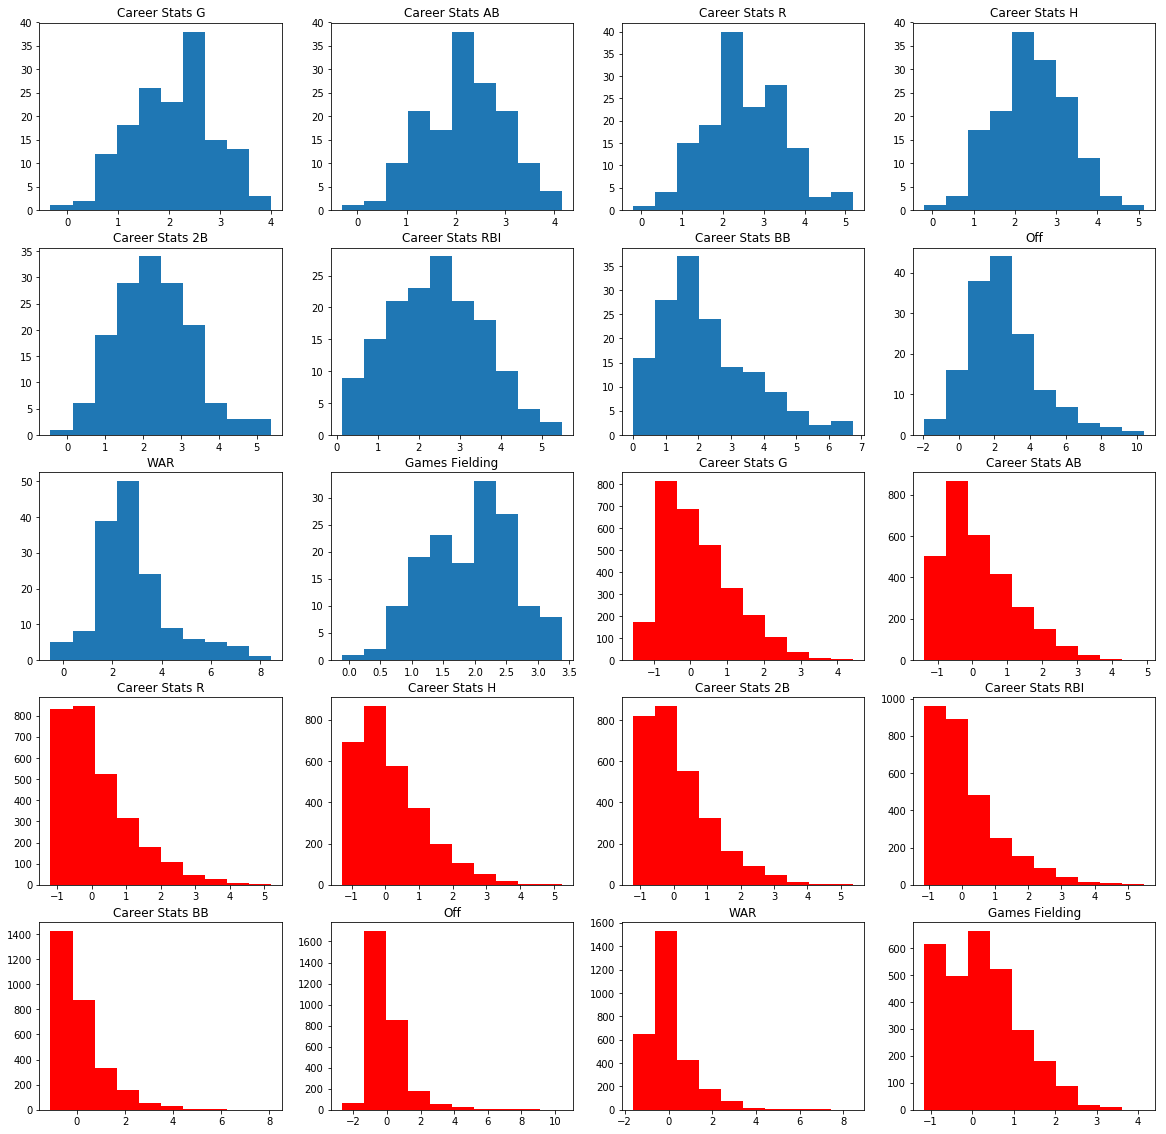

In [72]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,20))
numcols = len(hof_reduct.columns)

arrplts = [0]*numcols
arrpltsreg = [0]*numcols

for i in np.arange(numcols):    
    arrplts[i] = fig.add_subplot(5,4,i+1)
    arrplts[i].hist(hof_reduct.iloc[:,i])
    arrplts[i].set_title(hof_reduct.columns[i])

for i in np.arange(numcols):
    arrpltsreg[i] = fig.add_subplot(5,4,10+i+1)
    arrpltsreg[i].hist(data_reduct.iloc[:,i],color='Red')
    arrpltsreg[i].set_title(data_reduct.columns[i])

plt.show()

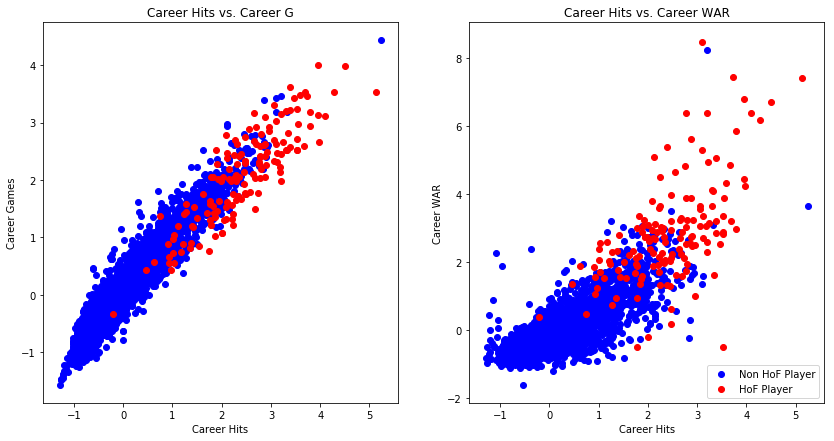

In [35]:
# Initialize the figure and add subplots
fig = plt.figure(figsize=(14, 7))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

# Create Scatter plots for Hits vs. Average and Home Runs vs. Average
ax1.scatter(nothof_reduct['Career Stats H'], nothof_reduct['Career Stats G'], c='b', label='Non HoF Player')
ax1.scatter(hof_reduct['Career Stats H'], hof_reduct['Career Stats G'], c='r', label='HoF Player')
ax1.set_title('Career Hits vs. Career G')
ax1.set_xlabel('Career Hits')
ax1.set_ylabel('Career Games')
ax2.scatter(nothof_reduct['Career Stats H'], nothof_reduct['WAR'], c='b', label='Non HoF Player')
ax2.scatter(hof_reduct['Career Stats H'], hof_reduct['WAR'], c='r', label='HoF Player')
ax2.set_title('Career Hits vs. Career WAR')
ax2.set_ylabel('Career WAR')
ax2.set_xlabel('Career Hits')
ax2.legend(loc='lower right', scatterpoints=1)

# Show the plot
plt.show()

In [36]:
from sklearn.linear_model import LogisticRegressionCV

clf = LogisticRegressionCV(cv=5, random_state=0, solver='lbfgs', max_iter=10000, class_weight='balanced').fit(data_frame, labels)

predictions_lr = clf.predict(data_frame)

In [37]:
clf.score(data_frame, labels)

0.9778776356723125

In [38]:
predictions_recent = clf.predict(recentdata_frame)
pr = np.asarray(np.where(np.isin(predictions_recent, 1)))
pr = pr[0]
print (len(pr))
recenthof = recentdata.iloc[pr,:]
recenthof = pd.merge(recenthof, people, on='playerID')
# recenthof[['Name']]

predictions_recent_probs = np.asarray(clf.predict_proba(recentdata_frame))
prpt = predictions_recent_probs[:,1]
ixs = np.asarray(np.nonzero(prpt > .5))[0]
recenthof['probs'] = prpt[prpt>.5]
recenthof[['Name', 'probs']]

12


,Name,probs
0,Adrian Beltre,0.999906
1,Carlos Beltran,0.998823
2,Jason Giambi,0.889027
3,Derek Jeter,1.000000
4,Joe Mauer,0.996124
5,Brian McCann,0.964518
6,Yadier Molina,0.763639
7,Buster Posey,0.996227
8,Albert Pujols,0.980307
9,Alex Rodriguez,1.000000


In [39]:
np_predictions_lr = np.asarray(predictions_lr)
np_labels = labels

In [40]:
diff = np_labels - np_predictions_lr
print (np.unique(diff))
fpix = np.asarray(np.where(np.isin(diff, -1)))
fnix = np.asarray(np.where(np.isin(diff, 1)))
fpix = fpix[0]
fnix = fnix[0]
fpframe = data.iloc[fpix,:]
fnframe = data.iloc[fnix,:]
fpframe = pd.merge(fpframe, people, on='playerID')
fnframe = pd.merge(fnframe, people, on='playerID')

[-1  0]


In [41]:
fnframe[['Name']]

,Name


In [42]:
fpframe[['Name']]

,Name
0,Moises Alou
1,Dick Bartell
2,Buddy Bell
3,Wally Berger
4,Barry Bonds
5,Ken Boyer
6,Smoky Burgess
7,Ron Cey
8,Cupid Childs
9,Lave Cross


Confusion matrix, without normalization
[[2678   64]
 [   0  151]]
Normalized confusion matrix
[[0.98 0.02]
 [0.   1.  ]]


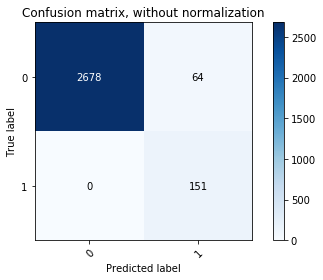

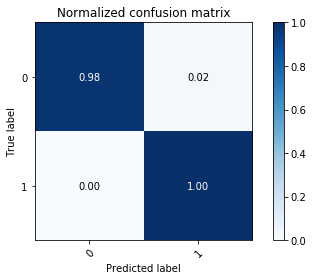

In [43]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    # classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(np_labels, np_predictions_lr, classes=[0,1],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(np_labels, np_predictions_lr, classes=[0,1], normalize=True,
                      title='Normalized confusion matrix')

plt.show()


In [44]:
from sklearn.metrics import average_precision_score, accuracy_score, balanced_accuracy_score, hinge_loss, matthews_corrcoef, roc_auc_score, f1_score, hamming_loss, jaccard_similarity_score, log_loss, zero_one_loss
probs_lr = clf.predict_proba(data_frame)

probs_lr = probs_lr[:,1]

#average_precision_score(np_labels, probs_lr)
#accuracy_score(np_labels, predictions_lr)
balanced_accuracy_score(np_labels, predictions_lr)
hinge_loss(np_labels, predictions_lr)
matthews_corrcoef(np_labels, predictions_lr)
roc_auc_score(np_labels, probs_lr)
f1_score(np_labels, predictions_lr)
hamming_loss(np_labels, predictions_lr)
jaccard_similarity_score(np_labels, predictions_lr)
log_loss(np_labels, predictions_lr)
zero_one_loss(np_labels, predictions_lr)

0.02212236432768755

In [61]:
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier(solver='sgd', activation='relu', learning_rate='adaptive', alpha=1e-1, max_iter=500, 
                   hidden_layer_sizes=(86,)*3, verbose=True).fit(data_frame, labels)

Iteration 1, loss = 0.66028399
Iteration 2, loss = 0.53630135
Iteration 3, loss = 0.44955387
Iteration 4, loss = 0.39622002
Iteration 5, loss = 0.35814688
Iteration 6, loss = 0.32880750
Iteration 7, loss = 0.30521809
Iteration 8, loss = 0.28593626
Iteration 9, loss = 0.26960287
Iteration 10, loss = 0.25610366
Iteration 11, loss = 0.24448657
Iteration 12, loss = 0.23444482
Iteration 13, loss = 0.22558326
Iteration 14, loss = 0.21788605
Iteration 15, loss = 0.21120821
Iteration 16, loss = 0.20497101
Iteration 17, loss = 0.19938678
Iteration 18, loss = 0.19445396
Iteration 19, loss = 0.18983095
Iteration 20, loss = 0.18590678
Iteration 21, loss = 0.18188032
Iteration 22, loss = 0.17842625
Iteration 23, loss = 0.17521427
Iteration 24, loss = 0.17226076
Iteration 25, loss = 0.16936308
Iteration 26, loss = 0.16685418
Iteration 27, loss = 0.16448473
Iteration 28, loss = 0.16211755
Iteration 29, loss = 0.16001127
Iteration 30, loss = 0.15801082
Iteration 31, loss = 0.15615527
Iteration 32, los

Iteration 258, loss = 0.08975619
Iteration 259, loss = 0.08966063
Iteration 260, loss = 0.08958551
Iteration 261, loss = 0.08950501
Iteration 262, loss = 0.08941841
Iteration 263, loss = 0.08932711
Iteration 264, loss = 0.08926742
Iteration 265, loss = 0.08912535
Iteration 266, loss = 0.08905841
Iteration 267, loss = 0.08902525
Iteration 268, loss = 0.08889970
Iteration 269, loss = 0.08880339
Iteration 270, loss = 0.08873908
Iteration 271, loss = 0.08866503
Iteration 272, loss = 0.08858927
Iteration 273, loss = 0.08848809
Iteration 274, loss = 0.08840539
Iteration 275, loss = 0.08831616
Iteration 276, loss = 0.08825677
Iteration 277, loss = 0.08816465
Iteration 278, loss = 0.08810600
Iteration 279, loss = 0.08805761
Iteration 280, loss = 0.08791838
Iteration 281, loss = 0.08785389
Iteration 282, loss = 0.08774389
Iteration 283, loss = 0.08770782
Iteration 284, loss = 0.08760873
Iteration 285, loss = 0.08751537
Iteration 286, loss = 0.08747809
Iteration 287, loss = 0.08737763
Iteration 

In [59]:
from sklearn.neural_network import MLPClassifier
#nn = MLPClassifier(solver='lbfgs', activation='logistic', learning_rate='adaptive', alpha=1e-5, hidden_layer_sizes=t, verbose=True)

numparams = len(data_frame.columns)
parameter_space = {
    'activation' : ['logistic', 'relu', 'tanh'],
    'hidden_layer_sizes': [(numparams,), (numparams,)*3],
    'alpha': [100, 10, 1e-1]
}
mlp = MLPClassifier(solver='sgd', activation='logistic', max_iter = 2000, learning_rate_init = 0.5, tol=1e-6, verbose=True)

In [60]:
from sklearn.model_selection import GridSearchCV

nn = GridSearchCV(mlp, parameter_space, cv=5)
nn.fit(data_frame, labels)

Iteration 1, loss = 1.87012634
Iteration 2, loss = 0.21362461
Iteration 3, loss = 0.21563965
Iteration 4, loss = 0.20959604
Iteration 5, loss = 0.20673887
Iteration 6, loss = 0.20809237
Iteration 7, loss = 0.21083411
Iteration 8, loss = 0.20815465
Iteration 9, loss = 0.20908109
Iteration 10, loss = 0.20750214
Iteration 11, loss = 0.20816359
Iteration 12, loss = 0.21202308
Iteration 13, loss = 0.20618305
Iteration 14, loss = 0.21347996
Iteration 15, loss = 0.20501475
Iteration 16, loss = 0.20639376
Iteration 17, loss = 0.20813022
Iteration 18, loss = 0.20776391
Iteration 19, loss = 0.20646402
Iteration 20, loss = 0.21008361
Iteration 21, loss = 0.20816415
Iteration 22, loss = 0.20852085
Iteration 23, loss = 0.20636897
Iteration 24, loss = 0.20872598
Iteration 25, loss = 0.21323229
Iteration 26, loss = 0.20798572
Training loss did not improve more than tol=0.000001 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 1.60745925
Iteration 2, loss = 0.21701303
Iteration 3, loss = 0.214

Iteration 6, loss = 0.17426024
Iteration 7, loss = 0.17311421
Iteration 8, loss = 0.17242327
Iteration 9, loss = 0.17002912
Iteration 10, loss = 0.16952709
Iteration 11, loss = 0.17135773
Iteration 12, loss = 0.16950373
Iteration 13, loss = 0.17245339
Iteration 14, loss = 0.17024777
Iteration 15, loss = 0.16961378
Iteration 16, loss = 0.16901081
Iteration 17, loss = 0.16931483
Iteration 18, loss = 0.16826800
Iteration 19, loss = 0.16890133
Iteration 20, loss = 0.16829385
Iteration 21, loss = 0.16963534
Iteration 22, loss = 0.17064993
Iteration 23, loss = 0.16952295
Iteration 24, loss = 0.17281698
Iteration 25, loss = 0.16950663
Iteration 26, loss = 0.16746962
Iteration 27, loss = 0.16739795
Iteration 28, loss = 0.17016403
Iteration 29, loss = 0.17084993
Iteration 30, loss = 0.16812038
Iteration 31, loss = 0.16778171
Iteration 32, loss = 0.16816464
Iteration 33, loss = 0.16789582
Iteration 34, loss = 0.16671088
Iteration 35, loss = 0.17120817
Iteration 36, loss = 0.16798580
Iteration 37

Iteration 14, loss = 0.21033689
Iteration 15, loss = 0.20819734
Iteration 16, loss = 0.20967047
Iteration 17, loss = 0.20950835
Iteration 18, loss = 0.20880572
Iteration 19, loss = 0.20680325
Iteration 20, loss = 0.20911274
Iteration 21, loss = 0.20863953
Iteration 22, loss = 0.20760877
Iteration 23, loss = 0.21242418
Iteration 24, loss = 0.20743276
Iteration 25, loss = 0.21579616
Iteration 26, loss = 0.20741176
Iteration 27, loss = 0.21275925
Iteration 28, loss = 0.20916642
Iteration 29, loss = 0.20765463
Iteration 30, loss = 0.20832886
Training loss did not improve more than tol=0.000001 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 1.40776541
Iteration 2, loss = 0.33565103
Iteration 3, loss = 0.24042777
Iteration 4, loss = 0.21748507
Iteration 5, loss = 0.20917523
Iteration 6, loss = 0.21366848
Iteration 7, loss = 0.21093453
Iteration 8, loss = 0.20781472
Iteration 9, loss = 0.21062044
Iteration 10, loss = 0.20729665
Iteration 11, loss = 0.20772704
Iteration 12, loss = 0.

Iteration 58, loss = 0.03816309
Iteration 59, loss = 0.03896369
Iteration 60, loss = 0.03745915
Iteration 61, loss = 0.03705421
Iteration 62, loss = 0.03717804
Iteration 63, loss = 0.03890076
Iteration 64, loss = 0.03746843
Training loss did not improve more than tol=0.000001 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.44112450
Iteration 2, loss = 0.15058218
Iteration 3, loss = 0.15663273
Iteration 4, loss = 0.14485881
Iteration 5, loss = 0.12876456
Iteration 6, loss = 0.11488697
Iteration 7, loss = 0.10470080
Iteration 8, loss = 0.09757501
Iteration 9, loss = 0.09165363
Iteration 10, loss = 0.08821962
Iteration 11, loss = 0.08084572
Iteration 12, loss = 0.07677079
Iteration 13, loss = 0.07356000
Iteration 14, loss = 0.06960427
Iteration 15, loss = 0.06782778
Iteration 16, loss = 0.06477430
Iteration 17, loss = 0.06206336
Iteration 18, loss = 0.05949500
Iteration 19, loss = 0.05798473
Iteration 20, loss = 0.05696898
Iteration 21, loss = 0.05422019
Iteration 22, loss = 0.

Iteration 49, loss = 0.04017284
Iteration 50, loss = 0.03986925
Iteration 51, loss = 0.03998441
Iteration 52, loss = 0.03965687
Iteration 53, loss = 0.03934519
Iteration 54, loss = 0.03937270
Iteration 55, loss = 0.03922012
Iteration 56, loss = 0.03971187
Iteration 57, loss = 0.03958848
Iteration 58, loss = 0.04007413
Iteration 59, loss = 0.03944251
Iteration 60, loss = 0.03891146
Iteration 61, loss = 0.03899292
Iteration 62, loss = 0.03898594
Iteration 63, loss = 0.03837800
Iteration 64, loss = 0.03840895
Iteration 65, loss = 0.03905362
Iteration 66, loss = 0.03820428
Iteration 67, loss = 0.03817566
Iteration 68, loss = 0.03873414
Iteration 69, loss = 0.03841264
Iteration 70, loss = 0.03836505
Iteration 71, loss = 0.03813647
Iteration 72, loss = 0.03783962
Iteration 73, loss = 0.03840867
Iteration 74, loss = 0.03835668
Iteration 75, loss = 0.03799170
Iteration 76, loss = 0.03783573
Iteration 77, loss = 0.03729409
Iteration 78, loss = 0.03736872
Iteration 79, loss = 0.03739679
Iteratio

Iteration 82, loss = 0.05119378
Iteration 83, loss = 0.05119333
Iteration 84, loss = 0.04992816
Iteration 85, loss = 0.05205992
Iteration 86, loss = 0.05088336
Iteration 87, loss = 0.04974907
Iteration 88, loss = 0.04934453
Iteration 89, loss = 0.04968192
Iteration 90, loss = 0.04964047
Training loss did not improve more than tol=0.000001 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.59658217
Iteration 2, loss = 0.25078373
Iteration 3, loss = 0.22021740
Iteration 4, loss = 0.19582212
Iteration 5, loss = 0.17170880
Iteration 6, loss = 0.15044756
Iteration 7, loss = 0.13292098
Iteration 8, loss = 0.11432302
Iteration 9, loss = 0.10021677
Iteration 10, loss = 0.09068692
Iteration 11, loss = 0.08565531
Iteration 12, loss = 0.08163388
Iteration 13, loss = 0.07936963
Iteration 14, loss = 0.07574295
Iteration 15, loss = 0.07423930
Iteration 16, loss = 0.07254141
Iteration 17, loss = 0.07081735
Iteration 18, loss = 0.07050052
Iteration 19, loss = 0.06986402
Iteration 20, loss = 0.

Iteration 94, loss = 0.05100571
Iteration 95, loss = 0.05076893
Iteration 96, loss = 0.05194569
Iteration 97, loss = 0.05076133
Iteration 98, loss = 0.05090606
Iteration 99, loss = 0.05065037
Iteration 100, loss = 0.05181019
Iteration 101, loss = 0.05129244
Iteration 102, loss = 0.05065124
Iteration 103, loss = 0.05056182
Iteration 104, loss = 0.05121548
Training loss did not improve more than tol=0.000001 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.46839739
Iteration 2, loss = 0.23757392
Iteration 3, loss = 0.21394937
Iteration 4, loss = 0.19115468
Iteration 5, loss = 0.16828503
Iteration 6, loss = 0.14959465
Iteration 7, loss = 0.13412272
Iteration 8, loss = 0.11749762
Iteration 9, loss = 0.10673208
Iteration 10, loss = 0.09636947
Iteration 11, loss = 0.09123596
Iteration 12, loss = 0.08805795
Iteration 13, loss = 0.08401198
Iteration 14, loss = 0.08133494
Iteration 15, loss = 0.07972981
Iteration 16, loss = 0.07849415
Iteration 17, loss = 0.07562821
Iteration 18, loss

Iteration 30, loss = 0.20583172
Iteration 31, loss = 0.20583099
Iteration 32, loss = 0.20582252
Iteration 33, loss = 0.20671128
Training loss did not improve more than tol=0.000001 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 4.03354047
Iteration 2, loss = 0.23872374
Iteration 3, loss = 0.21892673
Iteration 4, loss = 0.20878081
Iteration 5, loss = 0.20739440
Iteration 6, loss = 0.20556969
Iteration 7, loss = 0.20647858
Iteration 8, loss = 0.20666298
Iteration 9, loss = 0.20601286
Iteration 10, loss = 0.20627052
Iteration 11, loss = 0.20606043
Iteration 12, loss = 0.20641862
Iteration 13, loss = 0.20608336
Iteration 14, loss = 0.20725613
Iteration 15, loss = 0.20650139
Iteration 16, loss = 0.20812770
Iteration 17, loss = 0.20574681
Training loss did not improve more than tol=0.000001 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 10.61617773
Iteration 2, loss = 0.26052773
Iteration 3, loss = 0.21097196
Iteration 4, loss = 0.20602782
Iteration 5, loss = 0.20596705
I

Iteration 3, loss = 0.17307406
Iteration 4, loss = 0.14280759
Iteration 5, loss = 0.12508502
Iteration 6, loss = 0.12927677
Iteration 7, loss = 0.13748534
Iteration 8, loss = 0.12399955
Iteration 9, loss = 0.12601287
Iteration 10, loss = 0.13118891
Iteration 11, loss = 0.14291237
Iteration 12, loss = 0.12720024
Iteration 13, loss = 0.12263452
Iteration 14, loss = 0.13052641
Iteration 15, loss = 0.13038053
Iteration 16, loss = 0.12988819
Iteration 17, loss = 0.12388877
Iteration 18, loss = 0.12816750
Iteration 19, loss = 0.12286924
Iteration 20, loss = 0.12371044
Iteration 21, loss = 0.13244252
Iteration 22, loss = 0.13974355
Iteration 23, loss = 0.15028712
Iteration 24, loss = 0.12838741
Training loss did not improve more than tol=0.000001 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 1.30567832
Iteration 2, loss = 0.31327488
Iteration 3, loss = 0.16754350
Iteration 4, loss = 0.13338631
Iteration 5, loss = 0.13238480
Iteration 6, loss = 0.12486651
Iteration 7, loss = 0.12776

Iteration 51, loss = 0.03246688
Iteration 52, loss = 0.02929783
Iteration 53, loss = 0.02536517
Iteration 54, loss = 0.02364847
Iteration 55, loss = 0.02363022
Iteration 56, loss = 0.02167415
Training loss did not improve more than tol=0.000001 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.30186568
Iteration 2, loss = 0.11747389
Iteration 3, loss = 0.09317903
Iteration 4, loss = 0.09279601
Iteration 5, loss = 0.08183317
Iteration 6, loss = 0.07160367
Iteration 7, loss = 0.06419536
Iteration 8, loss = 0.06091361
Iteration 9, loss = 0.05173394
Iteration 10, loss = 0.04906056
Iteration 11, loss = 0.04455321
Iteration 12, loss = 0.04076940
Iteration 13, loss = 0.04135562
Iteration 14, loss = 0.04136003
Iteration 15, loss = 0.03592323
Iteration 16, loss = 0.03509475
Iteration 17, loss = 0.03392990
Iteration 18, loss = 0.03158924
Iteration 19, loss = 0.02932376
Iteration 20, loss = 0.02767168
Iteration 21, loss = 0.02687673
Iteration 22, loss = 0.02554025
Iteration 23, loss = 0.

Iteration 48, loss = 0.02496691
Iteration 49, loss = 0.02204062
Training loss did not improve more than tol=0.000001 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.29131991
Iteration 2, loss = 0.18280626
Iteration 3, loss = 0.14084719
Iteration 4, loss = 0.13549568
Iteration 5, loss = 0.11796981
Iteration 6, loss = 0.10733321
Iteration 7, loss = 0.10438440
Iteration 8, loss = 0.10047848
Iteration 9, loss = 0.08937978
Iteration 10, loss = 0.08601526
Iteration 11, loss = 0.08197134
Iteration 12, loss = 0.08125281
Iteration 13, loss = 0.07351472
Iteration 14, loss = 0.07017401
Iteration 15, loss = 0.06624741
Iteration 16, loss = 0.05619468
Iteration 17, loss = 0.05154860
Iteration 18, loss = 0.05807135
Iteration 19, loss = 0.06167638
Iteration 20, loss = 0.06212035
Iteration 21, loss = 0.05997198
Iteration 22, loss = 0.05350665
Iteration 23, loss = 0.04617936
Iteration 24, loss = 0.04770837
Iteration 25, loss = 0.05403836
Iteration 26, loss = 0.05033361
Iteration 27, loss = 0.

Iteration 10, loss = 0.09699230
Iteration 11, loss = 0.08836671
Iteration 12, loss = 0.08139248
Iteration 13, loss = 0.09569739
Iteration 14, loss = 0.08222196
Iteration 15, loss = 0.06886737
Iteration 16, loss = 0.07307160
Iteration 17, loss = 0.06713676
Iteration 18, loss = 0.06444244
Iteration 19, loss = 0.05812332
Iteration 20, loss = 0.06323345
Iteration 21, loss = 0.05619379
Iteration 22, loss = 0.05244495
Iteration 23, loss = 0.05216141
Iteration 24, loss = 0.05556910
Iteration 25, loss = 0.07548650
Iteration 26, loss = 0.06486268
Iteration 27, loss = 0.05267402
Iteration 28, loss = 0.05735353
Iteration 29, loss = 0.06065081
Iteration 30, loss = 0.04665278
Iteration 31, loss = 0.04906796
Iteration 32, loss = 0.05275033
Iteration 33, loss = 0.04834435
Iteration 34, loss = 0.04317360
Iteration 35, loss = 0.03588628
Iteration 36, loss = 0.03305224
Iteration 37, loss = 0.03822549
Iteration 38, loss = 0.05836669
Iteration 39, loss = 0.07630219
Iteration 40, loss = 0.04615495
Iteratio

Iteration 15, loss = 0.20630892
Iteration 16, loss = 0.20615729
Iteration 17, loss = 0.20692099
Iteration 18, loss = 0.20603168
Iteration 19, loss = 0.21082168
Iteration 20, loss = 0.20702408
Iteration 21, loss = 0.20664923
Iteration 22, loss = 0.20729576
Iteration 23, loss = 0.20745530
Iteration 24, loss = 0.20821128
Training loss did not improve more than tol=0.000001 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 10.63499177
Iteration 2, loss = 0.25878621
Iteration 3, loss = 0.21199209
Iteration 4, loss = 0.20675965
Iteration 5, loss = 0.20540475
Iteration 6, loss = 0.20574196
Iteration 7, loss = 0.20688348
Iteration 8, loss = 0.20590920
Iteration 9, loss = 0.20620718
Iteration 10, loss = 0.20719518
Iteration 11, loss = 0.20746851
Iteration 12, loss = 0.20668534
Iteration 13, loss = 0.20771162
Iteration 14, loss = 0.20602261
Iteration 15, loss = 0.20705599
Iteration 16, loss = 0.20665764
Training loss did not improve more than tol=0.000001 for 10 consecutive epochs. Stoppi

Iteration 4, loss = 0.19632237
Iteration 5, loss = 0.17039244
Iteration 6, loss = 0.16907934
Iteration 7, loss = 0.16376655
Iteration 8, loss = 0.16417117
Iteration 9, loss = 0.16595944
Iteration 10, loss = 0.16643942
Iteration 11, loss = 0.16837688
Iteration 12, loss = 0.16051004
Iteration 13, loss = 0.16478104
Iteration 14, loss = 0.16288163
Iteration 15, loss = 0.16379235
Iteration 16, loss = 0.16273844
Iteration 17, loss = 0.16355928
Iteration 18, loss = 0.16603305
Iteration 19, loss = 0.16257670
Iteration 20, loss = 0.16389251
Iteration 21, loss = 0.16145626
Iteration 22, loss = 0.16056233
Iteration 23, loss = 0.16247105
Training loss did not improve more than tol=0.000001 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 3.00873526
Iteration 2, loss = 0.50556280
Iteration 3, loss = 0.24208884
Iteration 4, loss = 0.19764101
Iteration 5, loss = 0.17875851
Iteration 6, loss = 0.16888553
Iteration 7, loss = 0.16930755
Iteration 8, loss = 0.16818850
Iteration 9, loss = 0.171415

Iteration 72, loss = 0.01437039
Iteration 73, loss = 0.01404679
Iteration 74, loss = 0.01460768
Iteration 75, loss = 0.01445168
Iteration 76, loss = 0.01446869
Iteration 77, loss = 0.01452550
Iteration 78, loss = 0.01387286
Training loss did not improve more than tol=0.000001 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.24084267
Iteration 2, loss = 0.08688717
Iteration 3, loss = 0.06901896
Iteration 4, loss = 0.05610999
Iteration 5, loss = 0.04948242
Iteration 6, loss = 0.04428377
Iteration 7, loss = 0.03943212
Iteration 8, loss = 0.03545103
Iteration 9, loss = 0.03258268
Iteration 10, loss = 0.03108977
Iteration 11, loss = 0.02989668
Iteration 12, loss = 0.02794619
Iteration 13, loss = 0.02658552
Iteration 14, loss = 0.02714373
Iteration 15, loss = 0.02564297
Iteration 16, loss = 0.02517162
Iteration 17, loss = 0.02488401
Iteration 18, loss = 0.02222730
Iteration 19, loss = 0.02151679
Iteration 20, loss = 0.02049786
Iteration 21, loss = 0.02022340
Iteration 22, loss = 0.

Iteration 2, loss = 0.14373881
Iteration 3, loss = 0.12465792
Iteration 4, loss = 0.10596887
Iteration 5, loss = 0.10119936
Iteration 6, loss = 0.09594220
Iteration 7, loss = 0.09042865
Iteration 8, loss = 0.08436322
Iteration 9, loss = 0.07428098
Iteration 10, loss = 0.06982977
Iteration 11, loss = 0.07193576
Iteration 12, loss = 0.08545917
Iteration 13, loss = 0.06920535
Iteration 14, loss = 0.06225581
Iteration 15, loss = 0.06596494
Iteration 16, loss = 0.06721837
Iteration 17, loss = 0.06718955
Iteration 18, loss = 0.06502987
Iteration 19, loss = 0.06422662
Iteration 20, loss = 0.05785846
Iteration 21, loss = 0.05993769
Iteration 22, loss = 0.06097792
Iteration 23, loss = 0.07042747
Iteration 24, loss = 0.07019187
Iteration 25, loss = 0.05987926
Iteration 26, loss = 0.05106364
Iteration 27, loss = 0.04831713
Iteration 28, loss = 0.04479536
Iteration 29, loss = 0.04894668
Iteration 30, loss = 0.04775888
Iteration 31, loss = 0.04609225
Iteration 32, loss = 0.05037517
Iteration 33, lo

Iteration 13, loss = 0.08565049
Iteration 14, loss = 0.07836305
Iteration 15, loss = 0.08594786
Iteration 16, loss = 0.08576499
Iteration 17, loss = 0.07924077
Iteration 18, loss = 0.07787551
Iteration 19, loss = 0.08025947
Iteration 20, loss = 0.07016002
Iteration 21, loss = 0.06129969
Iteration 22, loss = 0.05804254
Iteration 23, loss = 0.05643294
Iteration 24, loss = 0.08157903
Iteration 25, loss = 0.09976189
Iteration 26, loss = 0.07882570
Iteration 27, loss = 0.06151350
Iteration 28, loss = 0.08087543
Iteration 29, loss = 0.08432818
Iteration 30, loss = 0.06842416
Iteration 31, loss = 0.06067746
Iteration 32, loss = 0.05415952
Iteration 33, loss = 0.05230872
Iteration 34, loss = 0.06195678
Iteration 35, loss = 0.05706855
Iteration 36, loss = 0.06913254
Iteration 37, loss = 0.06197540
Iteration 38, loss = 0.05950638
Iteration 39, loss = 0.05081602
Iteration 40, loss = 0.04487343
Iteration 41, loss = 0.04497616
Iteration 42, loss = 0.04887764
Iteration 43, loss = 0.04106959
Iteratio

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.5, max_iter=2000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='sgd', tol=1e-06,
       validation_fraction=0.1, verbose=True, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'activation': ['logistic', 'relu', 'tanh'], 'hidden_layer_sizes': [(86,), (86, 86, 86)], 'alpha': [100, 10, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [61]:
print (nn.best_estimator_)

MLPClassifier(activation='logistic', alpha=0.1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(86, 86, 86), learning_rate='constant',
       learning_rate_init=0.5, max_iter=2000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='sgd', tol=1e-06,
       validation_fraction=0.1, verbose=True, warm_start=False)


In [77]:
predictions_nn = nn.predict(data_frame)
print (np.unique(predictions_nn))
print (nn.score(data_frame, labels))

[0 1]
0.9951607328033184


In [78]:
predictions_recentnn = nn.predict(recentdata_frame)
pr = np.asarray(np.where(np.isin(predictions_recentnn, 1)))
pr = pr[0]
recenthofnn = recentdata.iloc[pr,:]
recenthofnn = pd.merge(recenthofnn, people, on='playerID')
# recenthof[['Name']]

predictions_recent_probsnn = np.asarray(nn.predict_proba(recentdata_frame))
prptnn = predictions_recent_probsnn[:,1]
ixs = np.asarray(np.nonzero(prptnn > .5))[0]
recenthofnn['probs'] = prptnn[prptnn>.5]
recenthofnn[['Name', 'probs']]

,Name,probs
0,Adrian Beltre,0.760070
1,Carlos Beltran,0.625780
2,Miguel Cabrera,0.836224
3,Derek Jeter,0.557306
4,Buster Posey,0.796558
5,Albert Pujols,0.990240
6,Alex Rodriguez,0.966291
7,Jimmy Rollins,0.886612
8,Ichiro Suzuki,0.987758
9,Mike Trout,0.770739


In [79]:
np_predictions_nn = np.asarray(predictions_nn)
np_labels = labels
diff = np_labels - np_predictions_nn
print (np.unique(diff))
fpix = np.asarray(np.where(np.isin(diff, -1)))
fnix = np.asarray(np.where(np.isin(diff, 1)))
fpix = fpix[0]
fnix = fnix[0]
fpframe = data.iloc[fpix,:]
fnframe = data.iloc[fnix,:]
fpframe = pd.merge(fpframe, people, on='playerID')
fnframe = pd.merge(fnframe, people, on='playerID')

[-1  0  1]


In [80]:
fnframe[['Name']]

,Name
0,Earl Averill
1,Larry Doby
2,Rick Ferrell
3,Chick Hafey
4,Billy Hamilton
5,Monte Irvin
6,George Kell
7,Ray Schalk
8,Deacon White
9,Ross Youngs


In [81]:
fpframe[['Name']]

,Name
0,Lave Cross
1,Bill Dahlen
2,Stan Hack
3,Bob Johnson


Confusion matrix, without normalization
[[2738    4]
 [  10  141]]
Normalized confusion matrix
[[1.   0.  ]
 [0.07 0.93]]


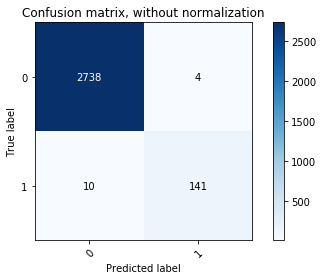

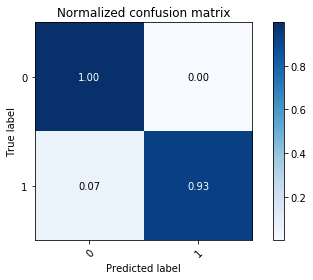

In [82]:
# Plot non-normalized confusion matrix
plot_confusion_matrix(np_labels, np_predictions_nn, classes=[0,1],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(np_labels, np_predictions_nn, classes=[0,1], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [87]:
probs_nn = clf.predict_proba(data_frame)

probs_nn = probs_nn[:,1]

print(average_precision_score(np_labels, probs_nn))
print(accuracy_score(np_labels, predictions_nn))
print(balanced_accuracy_score(np_labels, predictions_nn))
print(hinge_loss(np_labels, predictions_nn))
print(matthews_corrcoef(np_labels, predictions_nn))
print(roc_auc_score(np_labels, probs_nn))
print(f1_score(np_labels, predictions_nn))
print(hamming_loss(np_labels, predictions_nn))
print(jaccard_similarity_score(np_labels, predictions_nn))
print(log_loss(np_labels, predictions_nn))
print(zero_one_loss(np_labels, predictions_nn))

0.9261553438701102
0.9951607328033184
0.9661580226160631
0.9526443138610439
0.9503705984126386
0.9960318035368392
0.9527027027027026
0.004839267196681645
0.9951607328033184
0.16714347318301873
0.004839267196681596


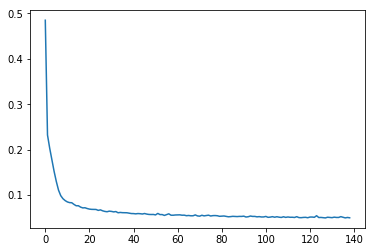

In [84]:
plt.plot(nn.best_estimator_.loss_curve_)

In [291]:
selector = SelectKBest(mutual_info_classif, k=25)

data_unscale_frame = data_unscale[data_unscale.columns[1:]]

#selector.fit(data_unscale_frame, labels)

hof = data_unscale_frame.copy()

# Get columns to keep
cols = selector.get_support(indices=True)
# Create new dataframe with only desired columns, or overwrite existing
data_reduct = data_unscale_frame.iloc[:,cols]

ix = np.asarray(np.where(np.isin(labels, 1)))
ix = ix[0]
hof = data_reduct.iloc[ix,:]
ixnot = np.asarray(np.where(np.isin(labels,0)))
ixnot = ixnot[0]

NotFittedError: This SelectKBest instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [173]:
# import packages for clustering
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import AffinityPropagation

from sklearn.mixture import GaussianMixture

from sklearn import metrics

In [293]:
# train a variety of models with varying numbers of clusters
for num_clusters in range(2,30):
    km_model = KMeans(n_clusters=num_clusters, max_iter=500)
    km_model.fit(hof)
    ac_model = AgglomerativeClustering(n_clusters=num_clusters)
    ac_model.fit(hof)
    gmf_model = GaussianMixture(n_components=num_clusters, covariance_type="full", n_init=10)
    gmf_model.fit(hof)
    gms_model = GaussianMixture(n_components=num_clusters, covariance_type="spherical", n_init=10)
    gms_model.fit(hof)
    gmd_model = GaussianMixture(n_components=num_clusters, covariance_type="diag", n_init=10)
    gmd_model.fit(hof)
    gmt_model = GaussianMixture(n_components=num_clusters, covariance_type="tied", n_init=10)
    gmt_model.fit(hof)
    
    print("Training models with " + str(num_clusters) + " clusters")
    print("    {:<65} {:>10f}".format("k-means silhouette score:", metrics.silhouette_score(hof, km_model.labels_)))
    print("    {:<65} {:>10f}".format("agglomerative clustering silhouette score:", metrics.silhouette_score(hof, ac_model.labels_)))
    print("    {:<65} {:>10f}".format("gaussian mixtures with full covariance silhouette score:", metrics.silhouette_score(hof, gmf_model.predict(hof))))
    print("    {:<65} {:>10f}".format("gaussian mixtures with diagonal covariance silhouette score:", metrics.silhouette_score(hof, gmd_model.predict(hof))))
    print("    {:<65} {:>10f}".format("gaussian mixtures with spherical covariance silhouette score:", metrics.silhouette_score(hof, gms_model.predict(hof))))
    print("    {:<65} {:>10f}".format("gaussian mixtures with tied covariance silhouette score:", metrics.silhouette_score(hof, gmt_model.predict(hof))))
    print("\n")
    print("    {:<65} {:>10f}".format("v measure agreement score, k-means and spherical:", metrics.v_measure_score(km_model.labels_, gms_model.predict(hof))))
    print("    {:<65} {:>10f}".format("v measure agreement score, k-means and agglomerative:", metrics.v_measure_score(km_model.labels_, ac_model.labels_)))
    print("    {:<65} {:>10f}".format("v measure agreement score, k-means and full:", metrics.v_measure_score(km_model.labels_, gmf_model.predict(hof))))
    print("    {:<65} {:>10f}".format("v measure agreement score, agglomerative and full:", metrics.v_measure_score(ac_model.labels_, gmf_model.predict(hof))))

Training models with 2 clusters
    k-means silhouette score:                                           0.704224
    agglomerative clustering silhouette score:                          0.647016
    gaussian mixtures with full covariance silhouette score:            0.704224
    gaussian mixtures with diagonal covariance silhouette score:        0.453479
    gaussian mixtures with spherical covariance silhouette score:       0.702201
    gaussian mixtures with tied covariance silhouette score:            0.704224


    v measure agreement score, k-means and spherical:                   0.821229
    v measure agreement score, k-means and agglomerative:               0.668844
    v measure agreement score, k-means and full:                        1.000000
    v measure agreement score, agglomerative and full:                  0.668844
Training models with 3 clusters
    k-means silhouette score:                                           0.588266
    agglomerative clustering silhouette sco

Training models with 12 clusters
    k-means silhouette score:                                           0.384260
    agglomerative clustering silhouette score:                          0.382864
    gaussian mixtures with full covariance silhouette score:            0.375674
    gaussian mixtures with diagonal covariance silhouette score:       -0.050991
    gaussian mixtures with spherical covariance silhouette score:       0.364669
    gaussian mixtures with tied covariance silhouette score:            0.353560


    v measure agreement score, k-means and spherical:                   0.918399
    v measure agreement score, k-means and agglomerative:               0.896210
    v measure agreement score, k-means and full:                        0.836767
    v measure agreement score, agglomerative and full:                  0.839503
Training models with 13 clusters
    k-means silhouette score:                                           0.373763
    agglomerative clustering silhouette s

Training models with 22 clusters
    k-means silhouette score:                                           0.378384
    agglomerative clustering silhouette score:                          0.396459
    gaussian mixtures with full covariance silhouette score:            0.362523
    gaussian mixtures with diagonal covariance silhouette score:        0.123672
    gaussian mixtures with spherical covariance silhouette score:       0.332295
    gaussian mixtures with tied covariance silhouette score:            0.381290


    v measure agreement score, k-means and spherical:                   0.881024
    v measure agreement score, k-means and agglomerative:               0.915251
    v measure agreement score, k-means and full:                        0.862812
    v measure agreement score, agglomerative and full:                  0.864451
Training models with 23 clusters
    k-means silhouette score:                                           0.381554
    agglomerative clustering silhouette s

In [294]:
# Fit DBSCAN model
scaled_data = scale(hof)
best_sil_score = 0
best_ep = 0
best_min = 0
for epsilon in range(24,36):
    epsilon = float(epsilon)/6
    for min_cluster_size in range(3,7):
        db_model = DBSCAN(eps=float(epsilon), min_samples=min_cluster_size)
        db_model.fit(scaled_data)
        cluster_count = len(set(db_model.labels_)) - (1 if -1 in db_model.labels_ else 0)
        n_noise_points = list(db_model.labels_).count(-1)
        print("Training DBSCAN model with epsilon value {} and minimum cluster size {}".format(epsilon, min_cluster_size))
        print("    {:<50} {:>10f}".format("Number of clusters:", cluster_count))
        print("    {:<50} {:>10f}".format("Number of samples classified as noise:", n_noise_points))
        if len(set(db_model.labels_)) > 1:
            sil_score = metrics.silhouette_score(scaled_data, db_model.labels_)
            print("    {:<50} {:>10f}".format("Silhouette score:", sil_score))
            if sil_score > best_sil_score:
                best_sil_score = sil_score
                best_ep = float(epsilon)
                best_min = min_cluster_size
print("\nThe best parameters were epsilon={} and min_samples={} with a silhouette score of {}".format(best_ep, best_min, best_sil_score))

#TODO: Determine who got classified as noise (especially in the best model)

C:\Users\tas12\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  


Training DBSCAN model with epsilon value 4.0 and minimum cluster size 3
    Number of clusters:                                  0.000000
    Number of samples classified as noise:             151.000000
Training DBSCAN model with epsilon value 4.0 and minimum cluster size 4
    Number of clusters:                                  0.000000
    Number of samples classified as noise:             151.000000
Training DBSCAN model with epsilon value 4.0 and minimum cluster size 5
    Number of clusters:                                  0.000000
    Number of samples classified as noise:             151.000000
Training DBSCAN model with epsilon value 4.0 and minimum cluster size 6
    Number of clusters:                                  0.000000
    Number of samples classified as noise:             151.000000
Training DBSCAN model with epsilon value 4.166666666666667 and minimum cluster size 3
    Number of clusters:                                  0.000000
    Number of samples classified

Training DBSCAN model with epsilon value 5.333333333333333 and minimum cluster size 5
    Number of clusters:                                  1.000000
    Number of samples classified as noise:             119.000000
    Silhouette score:                                   -0.030544
Training DBSCAN model with epsilon value 5.333333333333333 and minimum cluster size 6
    Number of clusters:                                  1.000000
    Number of samples classified as noise:             122.000000
    Silhouette score:                                   -0.047333
Training DBSCAN model with epsilon value 5.5 and minimum cluster size 3
    Number of clusters:                                  2.000000
    Number of samples classified as noise:             106.000000
    Silhouette score:                                   -0.062887
Training DBSCAN model with epsilon value 5.5 and minimum cluster size 4
    Number of clusters:                                  1.000000
    Number of samples cl

In [295]:
# Fit affinity propogation model
ap_model = AffinityPropagation()
ap_model.fit(hof)
print("Number of clusters in affinity propagation model: {}".format(len(ap_model.cluster_centers_indices_)))
print("Silhouette score of affinity propagation model: {}".format(metrics.silhouette_score(hof_reduct, ap_model.labels_)))

Number of clusters in affinity propagation model: 7
Silhouette score of affinity propagation model: -0.0602091297553394


In [299]:
# This is the model we will investigate more
model = KMeans(n_clusters=2, max_iter=500)
labels = model.fit_predict(hof)

# Sanity checking
print("type of hof_reduct: {}".format(type(hof)))
print("shape of data: {}".format(hof.shape))
print("shape of labels: {}".format(labels.shape))
zero_bools = [True if i == 1 else False for i in labels]
one_bools = [True if i == 0 else False for i in labels]

cluster_zero_data = hof[zero_bools]
cluster_one_data = hof[one_bools]

print("shape of cluster 0 data: {}".format(cluster_zero_data.shape))
print("shape of cluster 1 data: {}".format(cluster_one_data.shape))

type of hof_reduct: <class 'pandas.core.frame.DataFrame'>
shape of data: (151, 86)
shape of labels: (151,)
shape of cluster 0 data: (70, 86)
shape of cluster 1 data: (81, 86)


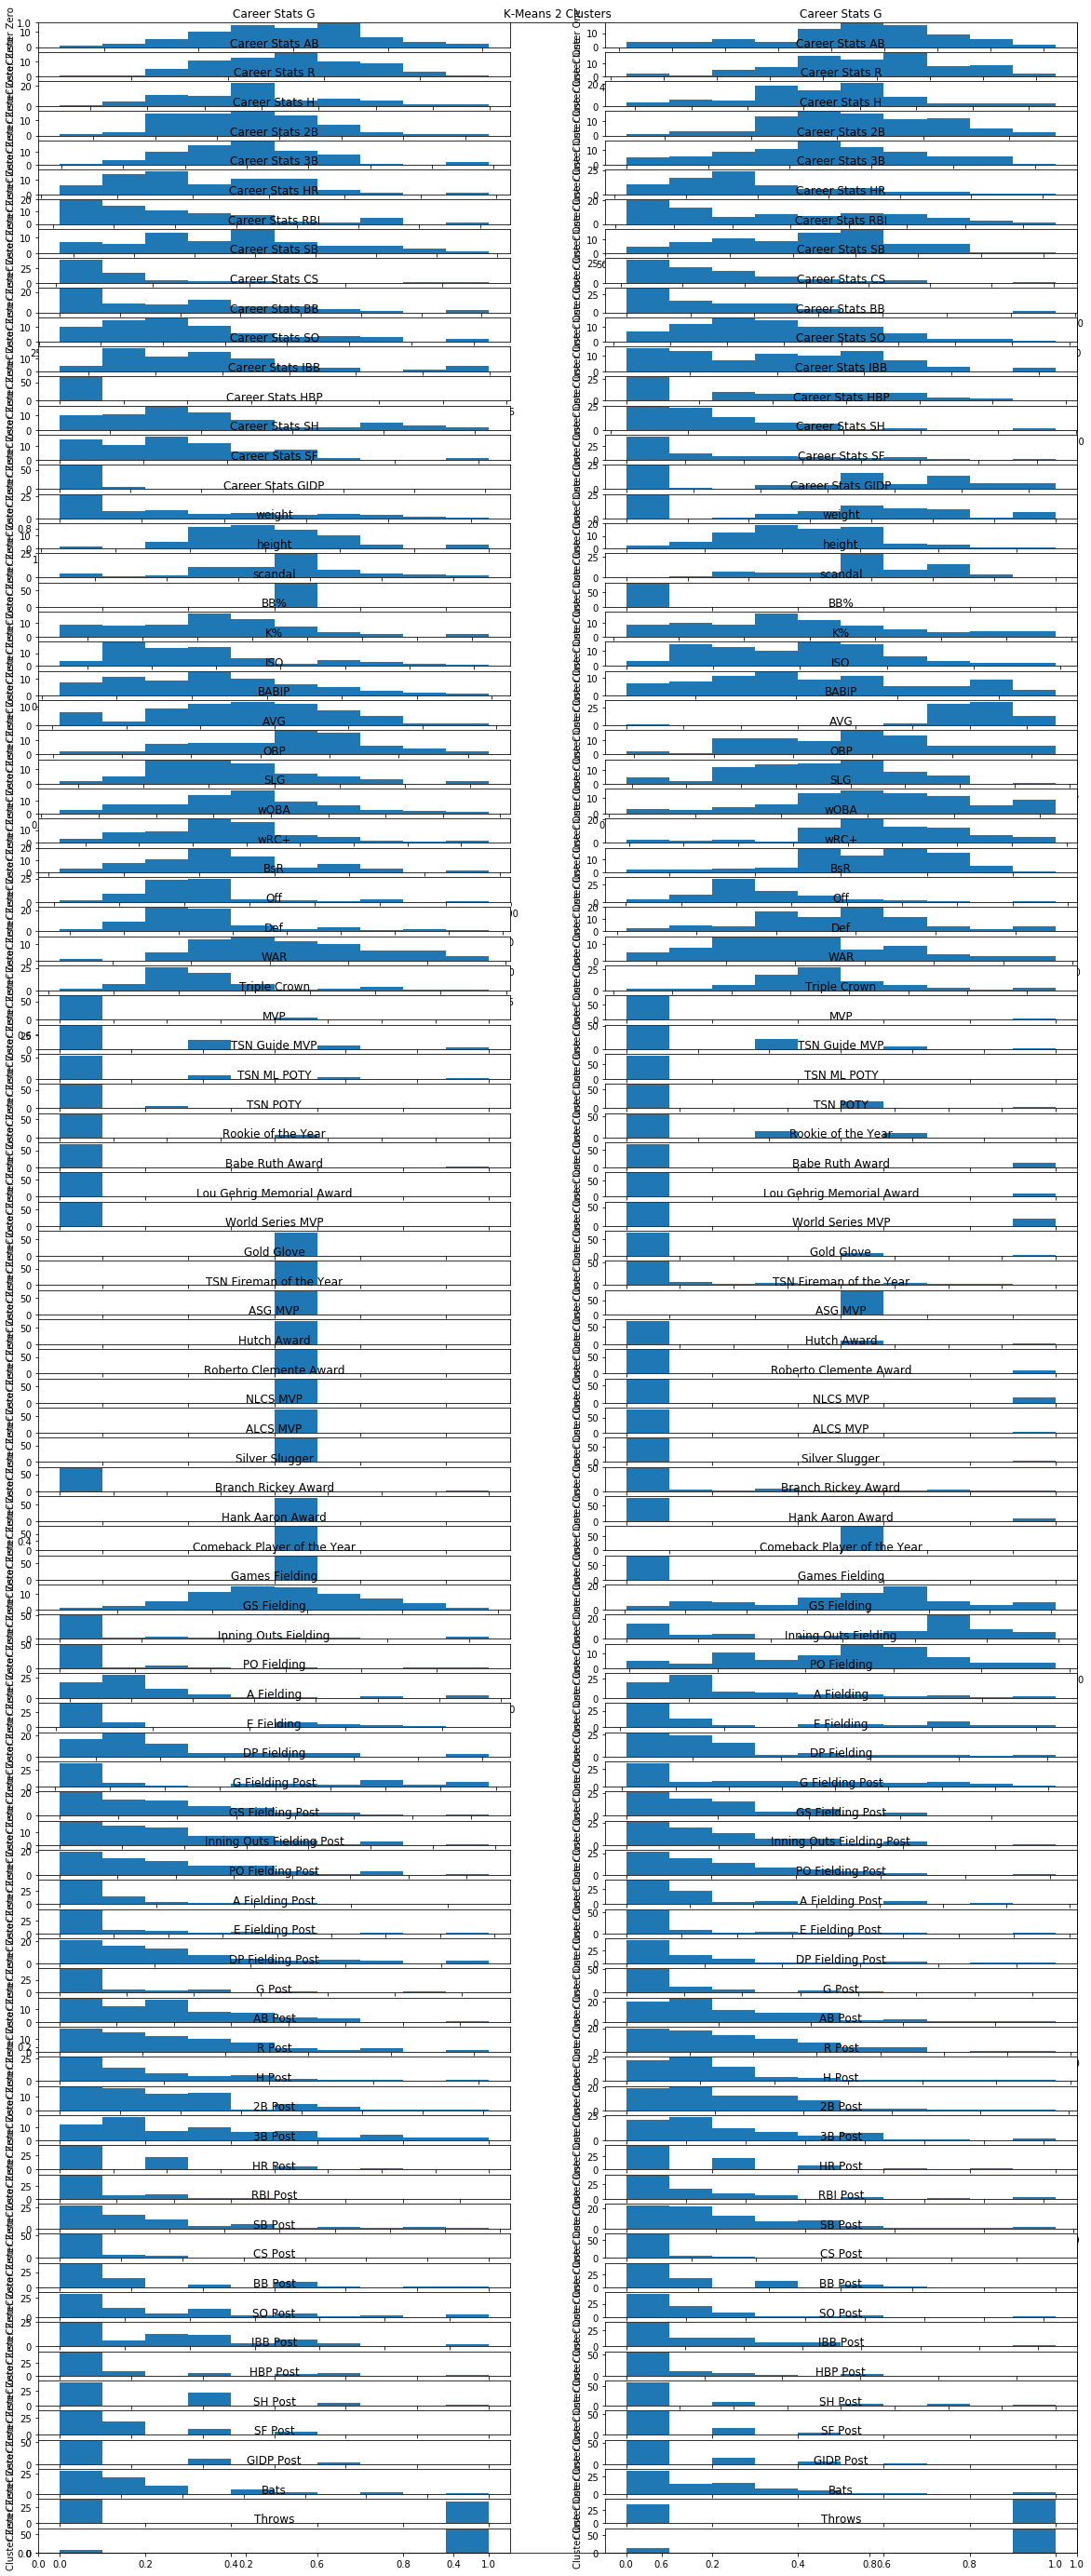

In [300]:
# This cell recreates the plots from above but only for one cluster at a time
# It displays one stat per row and places the two clusters side-by-side

fig = plt.figure(figsize=(20, 50))
plt.title("K-Means 2 Clusters")

stat_strings = list(hof)
num_stats = len(stat_strings)

subplots=[None]
for i in range(1, (2*num_stats)+1):
    subplots.append(fig.add_subplot(num_stats,2,i))



for i in range(num_stats):
    index = 2*(i+1)
    subplots[index].hist(cluster_one_data[stat_strings[i]])
    subplots[index].set_title(stat_strings[i])
    subplots[index].set_ylabel('Cluster One')
    index = index - 1
    subplots[index].hist(cluster_zero_data[stat_strings[i]])
    subplots[index].set_title(stat_strings[i])
    subplots[index].set_ylabel('Cluster Zero')
    
plt.show()

In [301]:
#print(cluster_zero_data)
#print(np.array(cluster_zero_data))

cluster_zero_data.index.tolist()

c_zero_players = []
c_one_players = []

for index in cluster_zero_data.index.tolist():
    c_zero_players.append(data.loc[str(index),'playerID'])

for index in cluster_one_data.index.tolist():
    c_one_players.append(data.loc[str(index),'playerID'])


hof_c_zero = hof[hof['playerID'].isin(c_zero_players)]
hof_c_one = hof[hof['playerID'].isin(c_one_players)]

print(hof_c_zero['yearID'].mean())
print(hof_c_one['yearID'].mean())

KeyError: 'playerID'